In [ ]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pylab as plt
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.9 MB/s eta 0:00:00


In [ ]:
def plot3d_error(eij, maxError,X, Y,  t_tensor):

  fig = go.Figure()

  for i in range(0, dimZ, 90):
      #= t[i]
      _z_ = t_tensor[i]


      fig.add_trace(
            go.Surface(
                y=_z_,
                x=X,
                z=Y,
                opacity=0.5,  # Transparencia
                surfacecolor=eij[i],  # Azul
                #showscale=False,  # Ocultar escala de colores
              showscale=True,  # Mostrar la barra de colores
              colorbar=dict(title="Error", tickvals=[0, 2, 4, 6, round(maxError,1)]),  # Escala de color entre 0 y 8
              cmin=0, cmax=8  # Rango de colores
            )
        )


  # Configurar diseño
  fig.update_layout(
      title="Planos y Scatter en función de t",
      scene=dict(
          xaxis_title="X",
          yaxis_title="tiempo",
          zaxis_title="Y",
          xaxis=dict(showgrid=True),  # Mostrar grid en X
          yaxis=dict(showgrid=True),  # Mostrar grid en Y
          zaxis=dict(showgrid=True),  # Mostrar grid en Z
          aspectratio=dict(
              x=1,  # Alargar el eje X
              y=2,  # Eje Y permanece igual
              z=1   # Eje Z permanece igual
          )
      ),
      scene_camera=dict(
        eye=dict(x=2, y=-1.3, z=1)
      )  # Ajusta el ángulo de visión
  )

  # Mostrar figura
  fig.show()
  fig.write_image("error_3D_burgers.jpg",scale=2)   # JPG

In [ ]:
run = "Ana"
#/content/drive/MyDrive/Docencia/Cursos/SeminarioTrabajoGrado/SeminarioTrabajoGradoAnaMaria/programas/PINNs/u_pinn_1.npy
if run == "Hernan":
  path = "/content/drive/MyDrive/Docencia/Cursos/SeminarioTrabajoGrado/"#SeminarioTrabajoGrado/SeminarioTrabajoGradoAnaMaria/programas/PINNs
  ruta = f"{path}SeminarioTrabajoGradoAnaMaria/programas/PINNs/u_tiempo.npy"
  ruta1= f"{path}SeminarioTrabajoGradoAnaMaria/programas/PINNs/u_pinn.npy"
  ruta2= f"{path}SeminarioTrabajoGradoAnaMaria/programas/PINNs/u_pinn_1.npy"
else:
  ruta = "/content/drive/My Drive/SeminarioTrabajoGradoAnaMaria/programas/PINNs/u_hist.npy"
  ruta1= "/content/drive/My Drive/SeminarioTrabajoGradoAnaMaria/programas/PINNs/U_pred_list.npy"
  #ruta2= "/content/drive/My Drive/SeminarioTrabajoGradoAnaMaria/programas/PINNs/u_pinn_1.npy"

In [ ]:
df_calor = np.load(ruta)
piml_calor= np.load(ruta1)
#piml1= np.load(ruta2)
np.shape(piml_calor),np.shape(df_calor)

((5000, 100), (5000, 100))

#========================================================================================


# Error relativo

Podemos definir el error por sitio asociado al campo velocidades como :



\begin{equation}
e^{i,j}(t) =   \frac{| U_{DF}^{i,j}   (t)- U_{Pinss}^{i,j}   (t) |}{U_{DF}^{i,j}(t)}
\end{equation}


\begin{equation}
Error(t) =  \left \langle e^{i,j}(t)  \right \rangle
\end{equation}



## Cálculo del error relativo


In [ ]:
def computo_error(diferenciasfinitas, piml, Ntimes=5000):
  eij = abs(diferenciasfinitas - piml)*100/abs(diferenciasfinitas)
  error = np.zeros(Ntimes)
  t = np.linspace(0,2,  Ntimes)
  for i in range(0, 5000):
    error[i] = np.mean(eij[i])
  return error, t

def computo_error_por_sitio(diferenciasfinitas, piml):
  eij = abs(diferenciasfinitas - piml)*100/abs(diferenciasfinitas)
  return eij

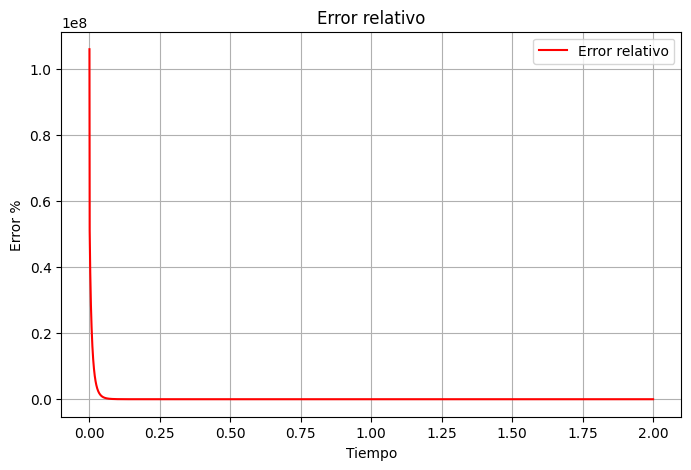

In [ ]:
error1, t = computo_error(df_calor, piml_calor)

plt.figure(figsize=(8,5))
plt.plot(t, error1, '-', color='red', label="Error relativo")
plt.xlabel('Tiempo')
plt.ylabel('Error %')
plt.title('Error relativo')
#plt.xlim(0.0, 0.02)
#plt.ylim(3, 3.5)
plt.legend()
plt.grid(True)
plt.savefig('error_relativo_pinn_calor.jpg')
plt.show()

In [ ]:
alpha = 0.1
x_test = np.linspace(0, 1, 100)
t_test = np.linspace(0, 1, 100)
u_exact_np = np.exp(-alpha * np.pi**2 * t_test) * np.sin(np.pi * x_test)


In [ ]:
# plt.figure(figsize=(10, 6))
# plt.subplot(1, 2, 1)
# plt.plot(x_test, df_calor[0:1].T, 'o', label="Solución PINN", markersize=3)
# plt.plot(x_test, u_exact_np, '-', label="Solución Teórica", linewidth=1.5)
# plt.xlabel("Posición (x)")
# plt.ylabel("Temperatura (u)")
# plt.title("Diferencias Finitas vs Teórica")
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(x_test, piml_calor[0:1], 'o', label="Solución DF", markersize=3)
# plt.plot(x_test, u_exact_np, '-', label="Solución Teórica", linewidth=1.5)
# plt.xlabel("Posición (x)")
# plt.ylabel("Temperatura (u)")
# plt.title("PINNs vs Teórica")
# plt.legend()
# plt.show()

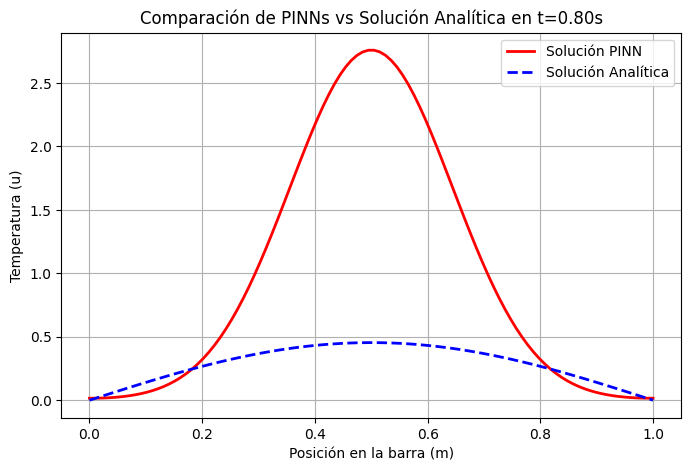

In [ ]:
# Seleccionar un tiempo específico para la comparación
t_index = 2000  # Cambiar según el tiempo deseado
t_val = t_index * (2/5000)  # Convertir índice a tiempo real

# Extraer la solución obtenida con PINNs en ese tiempo
U_pinns = df_calor[t_index]  # Shape (100,)

# Calcular la solución analítica en el mismo tiempo
x_plot = np.linspace(0, 1, 100)  # Puntos en el espacio
U_exacta = np.exp(-alpha * np.pi**2 * t_val) * np.sin(np.pi * x_plot)

# Graficar ambas soluciones
plt.figure(figsize=(8, 5))
plt.plot(x_plot, U_pinns, 'r-', label="Solución PINN", linewidth=2)
plt.plot(x_plot, U_exacta, 'b--', label="Solución Analítica", linewidth=2)
plt.xlabel("Posición en la barra (m)")
plt.ylabel("Temperatura (u)")
plt.title(f"Comparación de PINNs vs Solución Analítica en t={t_val:.2f}s")
plt.legend()
plt.grid()
plt.show()
